In [2]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [4]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [4]:
dataframe = read_csv("monthly_csv.csv", usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
dataframe.head()

,Price
0,34.73
1,34.73
2,34.73
3,34.73
4,34.73


In [10]:
dataset

array([[  34.73 ],
       [  34.73 ],
       [  34.73 ],
       [  34.73 ],
       [  34.73 ],
       [  34.73 ],
       [  34.73 ],
       [  34.73 ],
       [  34.73 ],
       [  34.73 ],
       [  34.73 ],
       [  34.72 ],
       [  34.72 ],
       [  34.73 ],
       [  34.73 ],
       [  34.73 ],
       [  34.73 ],
       [  34.73 ],
       [  34.72 ],
       [  34.71 ],
       [  34.71 ],
       [  34.71 ],
       [  34.73 ],
       [  34.66 ],
       [  34.49 ],
       [  34.49 ],
       [  34.68 ],
       [  34.82 ],
       [  34.73 ],
       [  34.53 ],
       [  34.57 ],
       [  34.58 ],
       [  34.51 ],
       [  34.63 ],
       [  34.72 ],
       [  34.79 ],
       [  34.88 ],
       [  34.95 ],
       [  34.92 ],
       [  34.93 ],
       [  34.9  ],
       [  34.89 ],
       [  34.91 ],
       [  34.91 ],
       [  34.76 ],
       [  34.79 ],
       [  34.86 ],
       [  34.85 ],
       [  34.86 ],
       [  34.88 ],
       [  34.92 ],
       [  35.04 ],
       [  35

In [63]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset

array([[1.37442723e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.31716952e-04],
       [1.31716952e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.31716952e-04],
       [1.25989318e-04],
       [1.25989318e-04],
       [1.25989318e-04],
       [1.37442723e-04],
       [9.73548740e-05],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.08810142e-04],
       [1.88985839e-04],
       [1.37442723e-04],
       [2.29049474e-05],
       [4.58136201e-05],
       [5.15412539e-05],
       [1.14515424e-05],
       [8.01756978e-05],
       [1.31716952e-04],
       [1.71804801e-04],
       [2.23346055e-04],
       [2.63433903e-04],
       [2.46252865e-04],
       [2.51980498e-04],


In [16]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [21]:
test

array([[0.22899704],
       [0.22601047],
       [0.22243863],
       [0.22667593],
       [0.22349352],
       [0.23095447],
       [0.24135616],
       [0.2494717 ],
       [0.25322908],
       [0.2719874 ],
       [0.29490057],
       [0.29838535],
       [0.29935724],
       [0.33064765],
       [0.36782408],
       [0.3226558 ],
       [0.34281147],
       [0.34193182],
       [0.3239455 ],
       [0.31621307],
       [0.33922186],
       [0.34076124],
       [0.34124172],
       [0.36114314],
       [0.35586756],
       [0.36967903],
       [0.36297974],
       [0.35576618],
       [0.36123648],
       [0.36081502],
       [0.3872244 ],
       [0.41232806],
       [0.44315633],
       [0.4404687 ],
       [0.48866943],
       [0.5095719 ],
       [0.5363575 ],
       [0.5023085 ],
       [0.48943737],
       [0.48967275],
       [0.5192411 ],
       [0.4615264 ],
       [0.45266807],
       [0.44573572],
       [0.41425803],
       [0.4498161 ],
       [0.4714556 ],
       [0.518

In [23]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [34]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [36]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 2s - loss: 0.0062
Epoch 2/100
 - 1s - loss: 0.0011
Epoch 3/100
 - 1s - loss: 8.0519e-05
Epoch 4/100
 - 1s - loss: 7.8931e-05
Epoch 5/100
 - 1s - loss: 7.8037e-05
Epoch 6/100
 - 1s - loss: 8.0580e-05
Epoch 7/100
 - 1s - loss: 7.9640e-05
Epoch 8/100
 - 1s - loss: 8.1681e-05
Epoch 9/100
 - 1s - loss: 8.2955e-05
Epoch 10/100
 - 1s - loss: 8.1551e-05
Epoch 11/100
 - 1s - loss: 8.3579e-05
Epoch 12/100
 - 1s - loss: 8.4005e-05
Epoch 13/100
 - 1s - loss: 8.1976e-05
Epoch 14/100
 - 1s - loss: 8.4498e-05
Epoch 15/100
 - 1s - loss: 8.3016e-05
Epoch 16/100
 - 1s - loss: 8.3208e-05
Epoch 17/100
 - 1s - loss: 8.5737e-05
Epoch 18/100
 - 1s - loss: 8.4124e-05
Epoch 19/100
 - 1s - loss: 8.4753e-05
Epoch 20/100
 - 1s - loss: 8.2468e-05
Epoch 21/100
 - 1s - loss: 8.2898e-05
Epoch 22/100
 - 1s - loss: 8.1561e-05
Epoch 23/100
 - 1s - loss: 8.2842e-05
Epoch 24/100
 - 1s - lo

In [78]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict

array([[3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.8933009e-04],
       [3.8933009e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.8933009e-04],
       [3.8362294e-04],
       [3.8362294e-04],
       [3.8362294e-04],
       [3.9503351e-04],
       [3.5511330e-04],
       [2.5815889e-04],
       [2.5815889e-04],
       [3.6652014e-04],
       [4.4636056e-04],
       [3.9503351e-04],
       [2.8097257e-04],
       [3.0378252e-04],
       [3.0948967e-04],
       [2.6956201e-04],
       [3.3799931e-04],
       [3.8933009e-04],
       [4.2925775e-04],
       [4.8058107e-04],
       [5.2050501e-04],
       [5.0339475e-04],
       [5.0909817e-04],
       [4.9198791e-04],
       [4.862882

In [40]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [43]:
trainPredict

array([[3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.8933009e-04],
       [3.8933009e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.8933009e-04],
       [3.8362294e-04],
       [3.8362294e-04],
       [3.8362294e-04],
       [3.9503351e-04],
       [3.5511330e-04],
       [2.5815889e-04],
       [2.5815889e-04],
       [3.6652014e-04],
       [4.4636056e-04],
       [3.9503351e-04],
       [2.8097257e-04],
       [3.0378252e-04],
       [3.0948967e-04],
       [2.6956201e-04],
       [3.3799931e-04],
       [3.8933009e-04],
       [4.2925775e-04],
       [4.8058107e-04],
       [5.2050501e-04],
       [5.0339475e-04],
       [5.0909817e-04],
       [4.9198791e-04],
       [4.862882

In [45]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.01 RMSE
Test Score: 0.14 RMSE


In [71]:
dataset

array([[1.37442723e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.31716952e-04],
       [1.31716952e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.37442723e-04],
       [1.31716952e-04],
       [1.25989318e-04],
       [1.25989318e-04],
       [1.25989318e-04],
       [1.37442723e-04],
       [9.73548740e-05],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.08810142e-04],
       [1.88985839e-04],
       [1.37442723e-04],
       [2.29049474e-05],
       [4.58136201e-05],
       [5.15412539e-05],
       [1.14515424e-05],
       [8.01756978e-05],
       [1.31716952e-04],
       [1.71804801e-04],
       [2.23346055e-04],
       [2.63433903e-04],
       [2.46252865e-04],
       [2.51980498e-04],


In [70]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)

trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


array([[          nan],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.8933009e-04],
       [3.8933009e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.9503351e-04],
       [3.8933009e-04],
       [3.8362294e-04],
       [3.8362294e-04],
       [3.8362294e-04],
       [3.9503351e-04],
       [3.5511330e-04],
       [2.5815889e-04],
       [2.5815889e-04],
       [3.6652014e-04],
       [4.4636056e-04],
       [3.9503351e-04],
       [2.8097257e-04],
       [3.0378252e-04],
       [3.0948967e-04],
       [2.6956201e-04],
       [3.3799931e-04],
       [3.8933009e-04],
       [4.2925775e-04],
       [4.8058107e-04],
       [5.2050501e-04],
       [5.0339475e-04],
       [5.0909817e-04],
       [4.919879

In [79]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
testPredictPlot

array([[       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [     

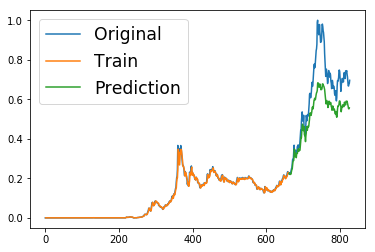

In [74]:
plt.plot(scaler.inverse_transform(dataset), label="Original") #Datos originales
plt.plot(trainPredictPlot, label="Train") #Datos de entrenamiento
plt.plot(testPredictPlot, label ="Prediction") #Datos predecidos 
plt.legend(loc='best', fontsize='xx-large')